In [2]:
import plotnine as p9
import pandas as pd
import scipy.stats as stats

In [3]:
data = pd.read_csv('undata_country_profile_variables.csv')
eudata = data[(data['Region']=='SouthernEurope') | (data['Region']=='NorthernEurope') | (data['Region']== 'EasternEurope') | (data['Region']== 'WesternEurope')]
eudata=eudata[eudata['country']!='Holy See']

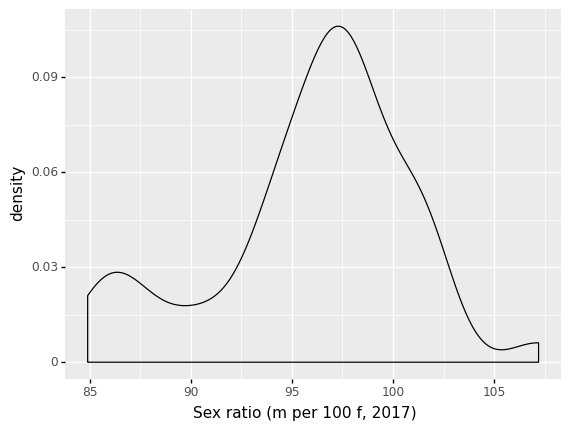


Ttest_1sampResult(statistic=-5.5863751832137805, pvalue=1.2013672443567394e-06)
Sex ratios are significantly biased


In [4]:
# Create the density plot
print(p9.ggplot(eudata)+ p9.aes('Sex ratio (m per 100 f, 2017)')+ p9.geom_density(alpha=0.5))

# Perform the one-sample t-test
t_result= stats.ttest_1samp(eudata['Sex ratio (m per 100 f, 2017)'], 100)
print(t_result)

# Test significance
alpha = 0.05
if t_result[1] < alpha:
    print("Sex ratios are significantly biased")
else:
    print("No significant bias found")

In [5]:
euas = ['SouthernEurope','NorthernEurope','EasternEurope','WesternEurope','WesternAsia','SouthernAsia','EasternAsia','EasternAsia']
euasdata = data[data['Region'].isin(euas)]
euasdata = euasdata[euasdata['country']!='Holy See']

In [6]:
euasdata['Continent'] = euasdata['Region'].map(lambda x: 'Asia' if (x.find('Asia')!= -1) else 'Europe')

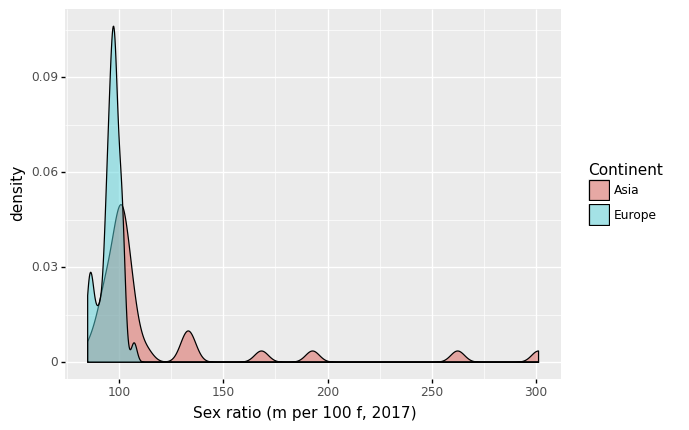

In [7]:
# Create the density plot
print(p9.ggplot(euasdata)+ p9.aes('Sex ratio (m per 100 f, 2017)', fill='Continent')+ p9.geom_density(alpha=0.5))

In [9]:
# Create two arrays
Europe_Sex_ratio = euasdata[euasdata.Continent == "Europe"]['Sex ratio (m per 100 f, 2017)']
Asia_Sex_ratio = euasdata[euasdata.Continent == "Asia"]['Sex ratio (m per 100 f, 2017)']

# Perform the two-sample t-test
t_result= stats.ttest_ind(Europe_Sex_ratio,Asia_Sex_ratio)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < 0.05):
    print("Europe and Asia have different mean sex ratios")
else: print("No significant difference found")

Ttest_indResult(statistic=-3.158577029594624, pvalue=0.00224641146509199)
Europe and Asia have different mean sex ratios
